NAME: DEEPESH BHATTA
    


## 2.5 (10pts) Let’s try out classification together with the PCA. For this question, you may use built-in functions or libraries. Use Logistic Regression with 10 output nodes with softmax function as the classifier. First, train a classifier using the raw images for 10 epochs and measure the training time. Then, train a classifier for 10 epochs using transformed data with 30 PCs, i.e., project each image to a 30-D space using the 30 PCs and train the classifier, and measure the training time. How much improvement in the training time? How are their performances on the testing set? Explain your thoughts.

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from keras.regularizers import L1L2

In [19]:
dataset = fetch_openml('mnist_784')
X = dataset.data
y = dataset.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000)

In [21]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [22]:
#Logistic Regression Model - A single-layer densely connected network, L2 regularization with coefficient 0.1
model = Sequential()
model.add(Dense(10,input_shape= (X_train.shape[1],), activation='softmax', kernel_regularizer=L1L2(l1=0.0, l2=0.1)))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
import time
batch_size = 128
tik = time.time()
model.fit(X_train, y_train, batch_size=batch_size ,epochs=10, verbose=1)
tok = time.time()
score = model.evaluate(X_test, y_test, verbose=0)
RunningTime ="{0:.4f}".format(1000 * (tok - tik))
print("Training Time : ",RunningTime, "ms")
print('Testing Accuracy: ', score[1]*100,"%")

Epoch 1/10
469/469 [==============================] - 0s 1ms/step - loss: 2.4773 - accuracy: 0.4930
Epoch 2/10
469/469 [==============================] - 0s 990us/step - loss: 1.1493 - accuracy: 0.7071
Epoch 3/10
469/469 [==============================] - 0s 915us/step - loss: 0.9051 - accuracy: 0.7593
Epoch 4/10
469/469 [==============================] - 0s 980us/step - loss: 0.6473 - accuracy: 0.8393
Epoch 5/10
469/469 [==============================] - 0s 963us/step - loss: 0.6423 - accuracy: 0.8391
Epoch 6/10
469/469 [==============================] - 0s 962us/step - loss: 0.6573 - accuracy: 0.8360
Epoch 7/10
469/469 [==============================] - 0s 998us/step - loss: 0.6517 - accuracy: 0.8389
Epoch 8/10
469/469 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.8419
Epoch 9/10
469/469 [==============================] - 0s 971us/step - loss: 0.6369 - accuracy: 0.8415
Epoch 10/10
469/469 [==============================] - 0s 965us/step - loss: 0.6517 - 

In [24]:
from PCA import PCA
X_pca = PCA(X, 30)
y = to_categorical(y, num_classes)
X_train_pca = X_pca[:60000]
y_train_pca = y[:60000]
X_test_pca = X_pca[60000:]
y_test_pca = y[60000:]

In [25]:
#Logistic Regression Model - A single-layer densely connected network, L2 regularization with coefficient 0.1
model_pca= Sequential()
model_pca.add(Dense(10,input_shape= (X_pca.shape[1],), activation='softmax', kernel_regularizer=L1L2(l1=0.0, l2=0.1)))
model_pca.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model_pca.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                310       
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


In [26]:
import time
tik_pca = time.time()
model_pca.fit(X_train_pca, y_train_pca, batch_size=batch_size ,epochs=10, verbose=1)
tok_pca = time.time()
score_pca = model_pca.evaluate(X_test_pca, y_test_pca, verbose=0)
RunningTime ="{0:.4f}".format(1000 * (tok_pca - tik_pca))
print("Training Time with PCA : " + str(1000 * (tok_pca - tik_pca)) + "ms")
print('Testing Accuracy with PCA: ', score_pca[1]*100,"%")

Epoch 1/10
469/469 [==============================] - 0s 639us/step - loss: 2.3467 - accuracy: 0.4460
Epoch 2/10
469/469 [==============================] - 0s 617us/step - loss: 0.6096 - accuracy: 0.8338
Epoch 3/10
469/469 [==============================] - 0s 621us/step - loss: 0.4969 - accuracy: 0.8459
Epoch 4/10
469/469 [==============================] - 0s 622us/step - loss: 0.5039 - accuracy: 0.8417
Epoch 5/10
469/469 [==============================] - 0s 622us/step - loss: 0.5030 - accuracy: 0.8425
Epoch 6/10
469/469 [==============================] - 0s 620us/step - loss: 0.5037 - accuracy: 0.8410
Epoch 7/10
469/469 [==============================] - 0s 619us/step - loss: 0.4995 - accuracy: 0.8437
Epoch 8/10
469/469 [==============================] - 0s 616us/step - loss: 0.4946 - accuracy: 0.8453
Epoch 9/10
469/469 [==============================] - 0s 620us/step - loss: 0.4969 - accuracy: 0.8444
Epoch 10/10
469/469 [==============================] - 0s 608us/step - loss: 0.504

## 2.6 (10pts) What do Neural Networks learn? Let’s take a look at the pre-trained Logistic Regression model using the raw data. Each output node has 784 weights associated with it. Reshape the weights to an 28x28 image; do this for the all output nodes and visualize each of them. Any interesting shapes? What do they represent? How do they differ from the features learned from PCA (from Q4)? Explain your thoughts.

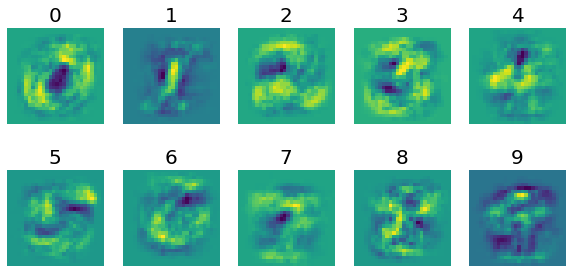

In [27]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
images = []
weight = (model.layers[0].get_weights()[0]+model.layers[0].get_weights()[1]).T
#generates matplotlib figure of size 10x10
fig = plt.figure(figsize=(10,10))
#iterates over each node
for i in range(10):
    #Reshape from (784,) to (28,28) and normalizes values
    weight[i] -= weight[i].min()
    weight[i] *= 255.0/weight[i].max()
    weight[i] = weight[i].astype(int)
    images.append([])
    for j in range(0,784,28):
        images[i].append(np.array(weight[i][j:j+28]))
    # adds a subplot to figure
    g=fig.add_subplot(4,5,i+1)
    # displays image on figure
    plt.imshow(images[i], interpolation='nearest')
    # sets title of image to node #
    g.set_title(str(i),size=20)
    # hides axis labels 
    plt.axis("off")